In [1]:
import os
import pandas as pd
import numpy as np
import glob

In [10]:
sub = 'sub-09'
ses = 'ses-02'
battery = 'camcan'
task = 'finger-tapping'

main_dir = '/home/sshankar/ibc/analysis_pipeline/ibc_main/neurospin_data/info/'
datadir = os.path.join(main_dir, sub, battery, ses)
os.chdir(datadir)
csv_files = sorted(glob.glob('*' + task + '*.txt'))
tsv_files = []
# for i in range(len(csv_files)):
i = 0
tsv_files.append(task + '_' + sub + '_run-0' + str(i+1) + '.tsv')

In [11]:
csv_files

['finger-tapping_sub-09_run-01_1618999400.txt',
 'finger-tapping_sub-09_run-02_1618999792.txt']

In [12]:
# In the log file run start is the file line.
# To extract it read in the first line by itself and then 
# read the rest of the file as a DataFrame.
line1 = pd.read_csv(os.path.join(datadir, csv_files[i]), sep=':', header=None, nrows=1)
run_start = line1[1][0]

In [13]:
run_start

1197.7309

In [14]:
# Read in the rest of the file
file_df = pd.read_csv(os.path.join(datadir, csv_files[i]), header=1, sep=',', skipinitialspace=True)

In [7]:
file_df

,Block#,Trial#,Stimulus#,TrialOnset,StimulusOnset,TrialOffest,KeyPressed#,KeyPressed,ResponseTime,RandOrder
0,0,1.0,4.0,1669.63,1669.68,2.2,NaN,<,1670.59,4.0
1,0,2.0,3.0,1671.83,1671.83,2.2,-9,-9.00,3.00,NaN
2,0,3.0,6.0,1674.03,1674.03,2.2,NaN,<,1674.79,1.0
3,0,4.0,2.0,1676.23,1676.23,2.2,g,1677.14,1.00,NaN
4,0,5.0,8.0,1678.43,1678.43,2.2,r,1679.10,4.00,NaN
...,...,...,...,...,...,...,...,...,...,...
120,0,116.0,2.0,1982.72,1982.72,2.2,g,1983.52,3.00,NaN
121,0,117.0,5.0,1984.92,1984.92,2.2,r,1985.62,3.00,NaN
122,0,118.0,8.0,1987.12,1987.12,2.2,g,1987.90,3.00,NaN
123,0,119.0,4.0,1989.32,1989.32,2.2,NaN,<,1990.54,2.0


In [15]:
# Find rows with trial information
trials = file_df['Block#'].str.contains('Rest')==False
# trials = file_df['Block#'] != 'Rest'

In [16]:
bl = file_df['Block#']

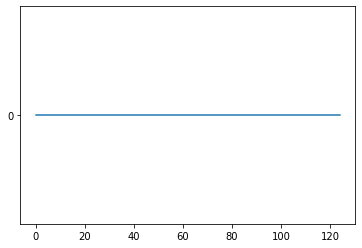

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(bl[trials])

In [27]:
trials[21]

True

In [17]:
# Extract the onsets of stimulus, probe and response
trial_onsets = file_df.loc[trials]['StimulusOnset']

# The stimuli are always on screen for 1s
durations = np.ones(sum(trials))

# The trials are coded numerically, and there are 9 types.
# We are interested in 3 categories:
# “specified” trials, in which subjects are told which finger to press (type 1-4)
# “chosen” trials, in which subjects choose one of many fingers to press (type 5-8)
# null events, where no finger press is required (type 9)
types = file_df.loc[trials]['Stimulus#']
trial_types = np.array(np.zeros(sum(trials), dtype=np.object_))

# Find indices of 'specified' trials and mark as such
s_list = [1, 2, 3, 4]
for si, s in enumerate(s_list):
    trial_types[types == s] = 'specified'

# Find indices of 'chosen' trials and mark as such
c_list = [5, 6, 7, 8]
for ci, c in enumerate(c_list):
    trial_types[types == c] = 'chosen'

# Find indices of 'null' trials and mark as such
trial_types[types == 9] = 'null'

In [10]:
trial_types

array(['specified', 'specified', 'chosen', 'specified', 'chosen', 'null',
       'chosen', 'chosen', 'null', 'null', 'specified', 'specified',
       'specified', 'null', 'specified', 'specified', 'specified',
       'chosen', 'null', 'null', 'chosen', 'chosen', 'specified', 'null',
       'chosen', 'null', 'specified', 'null', 'null', 'specified', 'null',
       'chosen', 'chosen', 'null', 'chosen', 'chosen', 'chosen', 'chosen',
       'specified', 'chosen', 'specified', 'chosen', 'chosen', 'null',
       'null', 'null', 'specified', 'null', 'chosen', 'specified', 'null',
       'specified', 'null', 'chosen', 'specified', 'specified', 'chosen',
       'null', 'specified', 'specified', 'chosen', 'null', 'null',
       'specified', 'null', 'null', 'chosen', 'null', 'chosen', 'null',
       'specified', 'chosen', 'chosen', 'chosen', 'specified', 'chosen',
       'null', 'specified', 'chosen', 'null', 'null', 'specified',
       'chosen', 'null', 'specified', 'specified', 'chosen', 'null'

In [18]:
# Create a DataFrame to save to events file
df = pd.DataFrame({'onset':(trial_onsets-run_start), 'duration':durations, 'trial_type':trial_types})
df.to_csv(os.path.join(datadir, tsv_files[0]), sep='\t', float_format='%0.3f', index=False)